In [1]:
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
from scipy.linalg import orth
from sklearn.metrics.pairwise import cosine_similarity as cosine
from sklearn.preprocessing import normalize
import seaborn as sns
from sklearn.decomposition import PCA
import torch as t
from terminaltables import AsciiTable as Table
from tqdm.notebook import tqdm

In [2]:
import os
import sys
sys.path.append('../src')

from nb_utils import *
from utils import accumulate_grads_over_epochs

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
../ckpts/mnist_centralized/history/
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
../ckpts/mnist_centralized/history/clf_fcn_paradigm_sgd_lr_0.1_decay_1e-05_batch_16.pkl


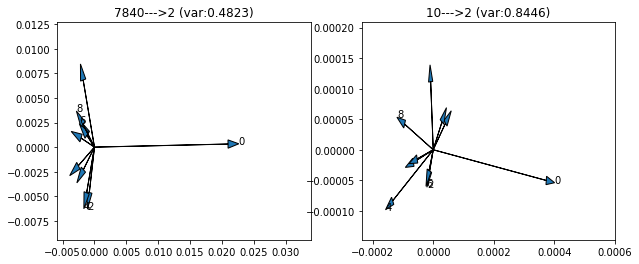

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
../ckpts/fmnist_centralized/history/
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
../ckpts/fmnist_centralized/history/clf_fcn_paradigm_sgd_lr_0.1_decay_1e-05_batch_16.pkl


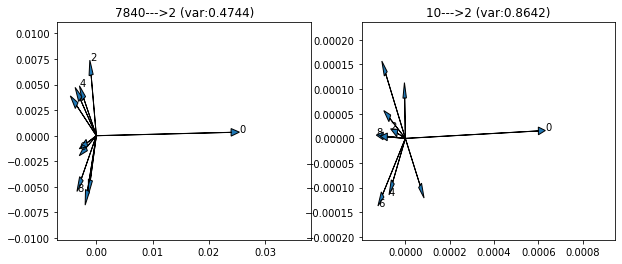

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
../ckpts/cifar_centralized/history/
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
../ckpts/cifar_centralized/history/clf_fcn_paradigm_sgd_lr_0.1_decay_1e-05_batch_16.pkl


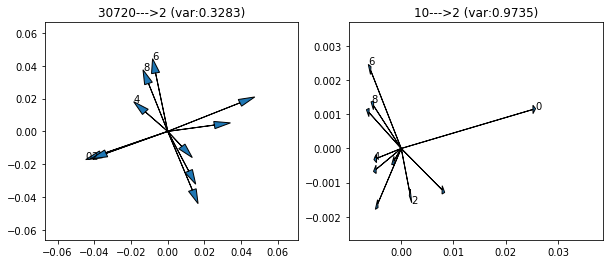

In [5]:
EPOCH = 10
folders = ['mnist_centralized', 'fmnist_centralized', 'cifar_centralized']
f_paths = ['../ckpts/{}/history/'.format(_) for _ in folders]
for path in f_paths:
    decor_print(path)
    files = sorted([_ for _ in os.listdir(path) 
                    if file_select(
                        _, ['kgrad', 'topk', 'adam', 'nc', 'rp'], ['lr_0.1']
                    )])
    for file in files:
        file = os.path.join(path, file)
        print(file)
        _,_,acc_test,_, loss_test, grads = pkl.load(open(file, 'rb'))
        mats = construct_grad_mat(grads[:EPOCH])
        for _, mat in mats.items():
            if _%2 == 0:
                plt.show()
                ax = init_plots()
                c = 0
            reduced_grads, var = pca_transform(mat, 2)
            title = '{}--->{} (var:{:.4f})'.format(
                mat.shape[1], reduced_grads.shape[1], var
            )
            plot_row_vectors(reduced_grads, ax[c], skip=2, title=title)
            c += 1
        plt.show()
        break

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
../ckpts/mnist_centralized/history/
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
../ckpts/mnist_centralized/history/clf_fcn_noise_None_paradigm_sgd_lr_0.01_decay_1e-05_batch_0.pkl


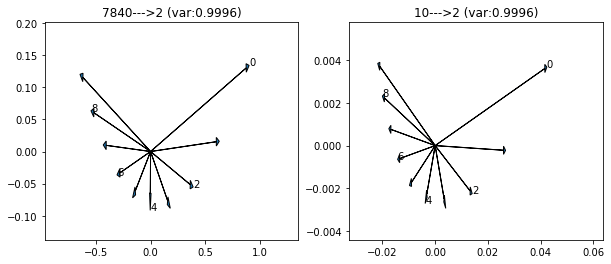

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
../ckpts/fmnist_centralized/history/
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
../ckpts/fmnist_centralized/history/clf_fcn_paradigm_sgd_lr_0.01_decay_1e-05_batch_16.pkl


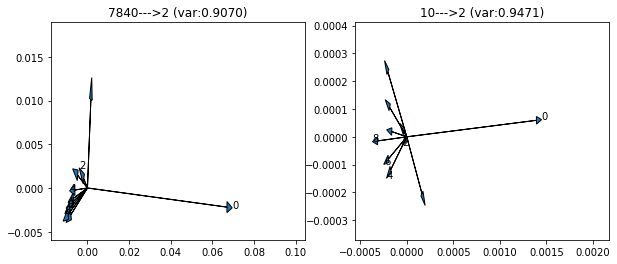

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
../ckpts/cifar_centralized/history/
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
../ckpts/cifar_centralized/history/clf_fcn_paradigm_sgd_lr_0.01_decay_1e-05_batch_16.pkl


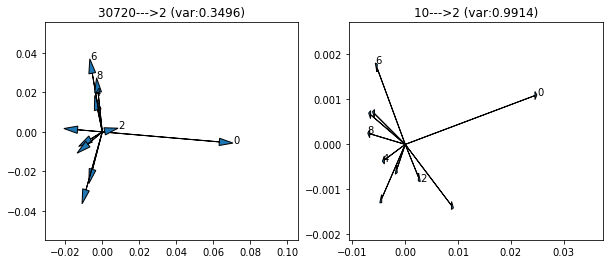

In [6]:
EPOCH = 10
folders = ['mnist_centralized', 'fmnist_centralized', 'cifar_centralized']
f_paths = ['../ckpts/{}/history/'.format(_) for _ in folders]
for path in f_paths:
    decor_print(path)
    files = sorted([_ for _ in os.listdir(path) 
                    if file_select(
                        _, ['kgrad', 'topk', 'adam', 'nc', 'rp'], ['lr_0.01']
                    )])
    for file in files:
        file = os.path.join(path, file)
        print(file)
        _,_,acc_test,_, loss_test, grads = pkl.load(open(file, 'rb'))
        mats = construct_grad_mat(grads[:EPOCH])
        for _, mat in mats.items():
            if _%2 == 0:
                plt.show()
                ax = init_plots()
                c = 0
            reduced_grads, var = pca_transform(mat, 2)
            title = '{}--->{} (var:{:.4f})'.format(
                mat.shape[1], reduced_grads.shape[1], var
            )
            plot_row_vectors(reduced_grads, ax[c], skip=2, title=title)
            c += 1
        plt.show()
        break

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
../ckpts/mnist_centralized/history/
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
../ckpts/mnist_centralized/history/clf_fcn_paradigm_sgd_lr_0.001_decay_1e-05_batch_16.pkl


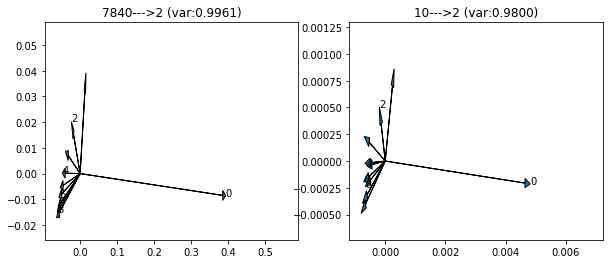

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
../ckpts/fmnist_centralized/history/
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
../ckpts/fmnist_centralized/history/clf_fcn_paradigm_sgd_lr_0.001_decay_1e-05_batch_16.pkl


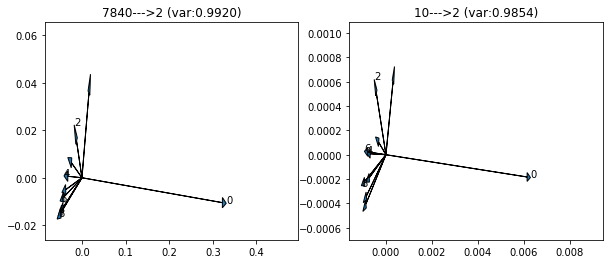

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
../ckpts/cifar_centralized/history/
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
../ckpts/cifar_centralized/history/clf_fcn_paradigm_sgd_lr_0.001_decay_1e-05_batch_16.pkl


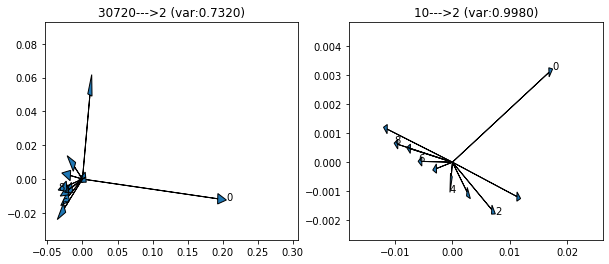

In [7]:
EPOCH = 10
folders = ['mnist_centralized', 'fmnist_centralized', 'cifar_centralized']
f_paths = ['../ckpts/{}/history/'.format(_) for _ in folders]
for path in f_paths:
    decor_print(path)
    files = sorted([_ for _ in os.listdir(path) 
                    if file_select(
                        _, ['kgrad', 'topk', 'adam', 'nc', 'rp'], ['lr_0.001']
                    )])
    for file in files:
        file = os.path.join(path, file)
        print(file)
        _,_,acc_test,_, loss_test, grads = pkl.load(open(file, 'rb'))
        mats = construct_grad_mat(grads[:EPOCH])
        for _, mat in mats.items():
            if _%2 == 0:
                plt.show()
                ax = init_plots()
                c = 0
            reduced_grads, var = pca_transform(mat, 2)
            title = '{}--->{} (var:{:.4f})'.format(
                mat.shape[1], reduced_grads.shape[1], var
            )
            plot_row_vectors(reduced_grads, ax[c], skip=2, title=title)
            c += 1
        plt.show()
        break